In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("shenyang_data.txt", index_col = 0)
data = data.astype("str")
data = data.reset_index(drop = True)

In [3]:
data

,交易 时间,交易公告 发布时间,交易公告 发布时间,交易公告发布时间,交易时间,公示 时间,公示时间,出让 年限,出让年限,占规划条件允许的最大建筑面积比例,...,成交单价（元/建筑㎡）,成交单价（元/建筑平方米）,成交单价（元㎡）,成交总价,成交总价 (元),成交总价 (元),成交总价(元),成交总价（元）,竞得单价（元/建筑平方米）,竞自持标准
0,nan,nan,nan,nan,nan,nan,公示时间,nan,nan,nan,...,成交单价（元/建筑㎡）,nan,nan,nan,nan,nan,成交总价(元),nan,nan,nan
1,nan,nan,nan,nan,nan,nan,2017-1-11,nan,nan,nan,...,268,nan,nan,nan,nan,nan,42541205.12,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,2017-1-11,nan,nan,nan,...,2740,nan,nan,nan,nan,nan,187078651.2,nan,nan,nan
3,nan,2013年7月31日拍卖交易地块发布信息表,nan,nan,nan,nan,nan,nan,nan,nan,...,2013年7月31日拍卖交易地块发布信息表,nan,nan,nan,nan,nan,2013年7月31日拍卖交易地块发布信息表,nan,nan,nan
4,nan,交易公告 发布时间,nan,nan,nan,nan,nan,nan,nan,nan,...,成交单价（元/建筑㎡）,nan,nan,nan,nan,nan,成交总价(元),nan,nan,nan
5,nan,交易公告 发布时间,nan,nan,nan,nan,nan,nan,nan,nan,...,成交单价（元/建筑㎡）,nan,nan,nan,nan,nan,成交总价(元),nan,nan,nan
6,nan,2013年3月4日挂牌交易地块发布信息表,nan,nan,2013年3月4日挂牌交易地块发布信息表,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,2013年3月4日挂牌交易地块发布信息表,nan,nan,nan,nan,nan
7,nan,交易公告 发布时间,nan,nan,交易时间,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,成交总价 (元),nan,nan,nan,nan,nan
8,nan,交易公告 发布时间,nan,nan,交易时间,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,成交总价 (元),nan,nan,nan,nan,nan
9,nan,13-1-30,nan,nan,2013-2-19至2013-3-4,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,7518496,nan,nan,nan,nan,nan


In [4]:
def has_number(row):
    for r in row:
        if any(c.isdigit() for c in r):
            return True
    return False
for i in data.index:
    row = data.loc[i]
    if has_number(row):
        continue
    else:
        data = data.drop(i)

In [5]:
years = ["2010","2011","2012","2013","2014","2015","2016","2017","2018"]
shorter_years = ["10-","11-","12-","13-","14-","15-","16-","17-","18-"]
data['year'] = 'nan'
for name in data.columns:
    if "时间" not in name:
        continue
    for i in data.index:
        if data.loc[i, name] == 'nan':
            continue
        for year in years:
            if year in data.loc[i, name]:
                data.loc[i, 'year'] = year
        for syear in shorter_years:
            if syear in data.loc[i, name] and data.loc[i, 'year'] == 'nan':
                data.loc[i, 'year'] = years[shorter_years.index(syear)]
data = data[data['year'] != 'nan']

In [6]:
data['area'] = 'nan'
for name in data.columns:
    if "面积" not in name:
        continue
    for i in data.index:
        if data.loc[i, name] == 'nan':
            continue
        try:
            data.loc[i, 'area'] = float(data.loc[i, name])
        except ValueError:
            continue
data = data[data['area'] != 'nan']

In [7]:
data['total_price'] = 'nan'
for name in data.columns:
    if "总价" not in name:
        continue
    for i in data.index:
        if data.loc[i, name] == 'nan':
            continue
        try:
            data.loc[i, 'total_price'] = float(data.loc[i, name])
        except ValueError:
            continue
data = data[data['total_price'] != 'nan']

In [8]:
data['single_price'] = 'nan'
for name in data.columns:
    if "单价" not in name:
        continue
    for i in data.index:
        if data.loc[i, name] == 'nan':
            continue
        try:
            data.loc[i, 'single_price'] = float(data.loc[i, name])
        except ValueError:
            continue
data = data[data['single_price'] != 'nan']

In [9]:
main_data = data[['year', 'area', 'total_price', 'single_price']]
main_data['area'] = main_data['area'].astype("float64")
main_data['total_price'] = main_data['total_price'].astype("float64")
main_data['single_price'] = main_data['single_price'].astype("float64")

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [10]:
year_data = main_data.groupby('year').count()
year_data['num'] = year_data['area']
year_data['total_sum'] = main_data.groupby('year')['total_price'].sum()
year_data['total_mean'] = main_data.groupby('year')['total_price'].mean()
year_data['single_mean'] = main_data.groupby('year')['single_price'].mean()
year_data['area_sum'] = main_data.groupby('year')['area'].sum()
year_data['area_mean'] = main_data.groupby('year')['area'].mean()
year_data = year_data[['num', 'total_sum', 'total_mean', 'single_mean', 'area_sum', 'area_mean']]

In [11]:
year_data

,num,total_sum,total_mean,single_mean,area_sum,area_mean
year,,,,,,
2012,218,2.287970e+10,1.049528e+08,1018.334862,10561592.28,48447.671009
2013,309,4.266779e+10,1.380835e+08,1348.456311,19160184.57,62007.069806
2014,136,1.326551e+10,9.754050e+07,1387.963235,6911775.79,50821.880809
2015,48,7.050220e+09,1.468796e+08,1867.791667,2180451.76,45426.078333
2016,51,1.438556e+10,2.820699e+08,2762.058824,2601127.16,51002.493333
2017,49,2.032103e+10,4.147149e+08,4180.795918,2455762.59,50117.603878
2018,57,1.922949e+10,3.373594e+08,2906.929825,2852021.77,50035.469649


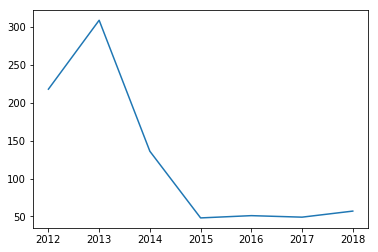

In [12]:
plt.plot(year_data['num'])

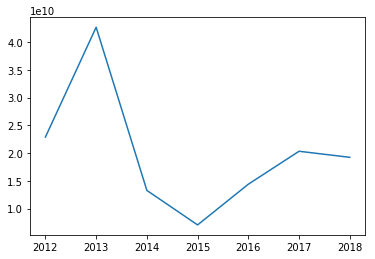

In [13]:
plt.plot(year_data['total_sum'])

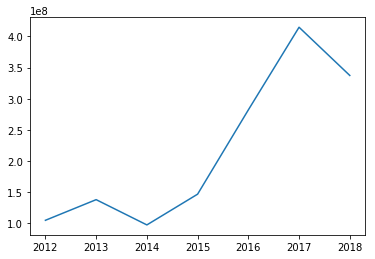

In [14]:
plt.plot(year_data['total_mean'])

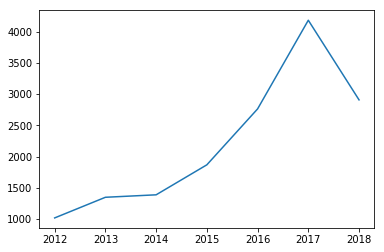

In [15]:
plt.plot(year_data['single_mean'])

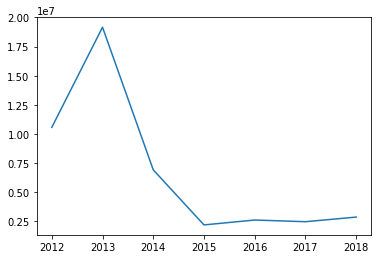

In [16]:
plt.plot(year_data['area_sum'])

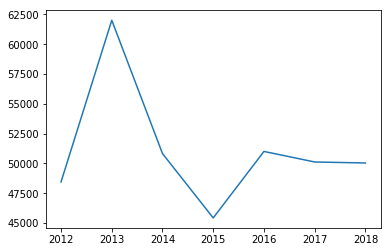

In [17]:
plt.plot(year_data['area_mean'])